# Exercise 5：
# Predicting House Price with Linear Regression

## Analyse Objectives

The purpose of this data analysis report is to perform a linear regression analysis based on available home sale prices, and attributes about the home, so that using the resulting linear regression model, price predictions can be made based on attributes for the following home with an unknown sale price:

**6,500 sq. ft. with 4 bedrooms, 2 toilets, 2 floors in total, not located on the main road, no guest house, with basement, hot water heater, no air conditioning, 2 parking spaces, located in the preferred neighbourhood of the city, with simple renovations.**

## Introduction

The dataset `house_price.csv` records the transaction prices of more than five hundred houses, as well as information on the relevant attributes of the house, including the size of the house, the number of bedrooms, the number of toilets, the number of floors, whether it is located on the main road, whether it has a guest room, and so on.
The meaning of each column of `house_price.csv` is as follows:
- price: the price at which the house is being sold
- area: the size of the house, in square feet
- bedrooms: number of bedrooms
- bathrooms: number of toilets
- stories: number of floors
- mainroad: is it on the main road
   - yes Yes
   - no No
- guestroom: whether there is a guest room
   - yes yes
   - yes yes no no
- basement: whether there is a basement
   - yes yes
   - yes yes no no
- hotwaterheating: whether there is a hot water heater
   - yes yes yes
   - yes yes no no
- airconditioning: whether there is air conditioning
   - yes yes
   - yes yes no no
- parking: capacity of the garage in number of vehicles
- prefarea: whether it is located in a preferred neighbourhood of the city
   - yes yes no no
   - yes yes no no
- furnishingstatus: furnishing status
   - furnished
   - semi-furnished
   - unfurnished

# Loading Data

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [126]:
df = pd.read_csv('house_price.csv')
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


**Summary:** No structure problem here.

#  Evaluating Data

### 1. missing Data

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**summary:**
no missing value

In [128]:
df['mainroad'] = df['mainroad'].astype("category")
df['guestroom'] = df['guestroom'].astype("category")
df['basement'] = df['basement'].astype("category")
df['hotwaterheating'] = df['hotwaterheating'].astype("category")
df['airconditioning'] = df['airconditioning'].astype("category")
df['prefarea'] = df['prefarea'].astype("category")
df['furnishingstatus'] = df['furnishingstatus'].astype("category")

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


### 2. Duplicated Data

Do not need to deal with it.

### 3. Inconsistent Data

In [130]:
df['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [131]:
df['guestroom'].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [132]:
df['basement'].value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [133]:
df['hotwaterheating'].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [134]:
df['airconditioning'].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [135]:
df['prefarea'].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [136]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

**summary:**
no inconsistent value

### 4. Invalid Data

In [137]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


**Summary:** This dataset do not exist invalid data.

# Data Exploration

In [138]:
sns.set_palette("pastel")

## Distribution of House Price

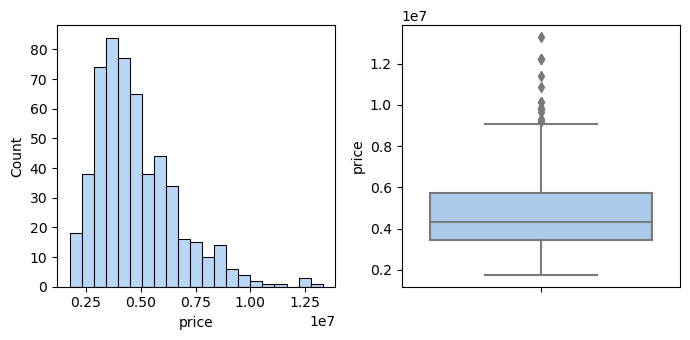

In [139]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 2)
sns.histplot(data = df, x='price', ax=axes[0])
sns.boxplot(data = df, y='price', ax=axes[1])
plt.show()

House prices are right-skewed, suggesting that most houses in the dataset are moderately priced, but there are some very high priced extremes that make the mean higher

## Distribution of Area

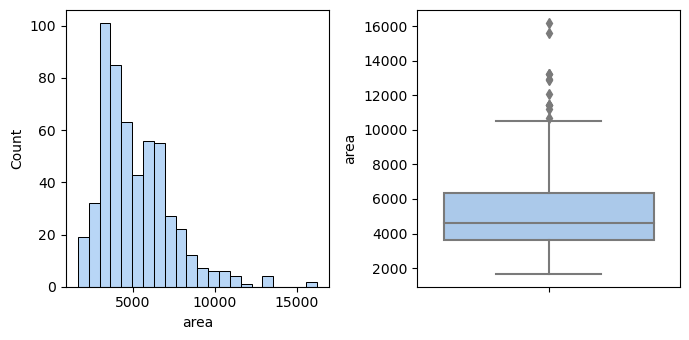

In [140]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 2)
sns.histplot(data = df, x='area', ax=axes[0])
sns.boxplot(data = df, y='area', ax=axes[1])
plt.show()

## Relationship between price and area

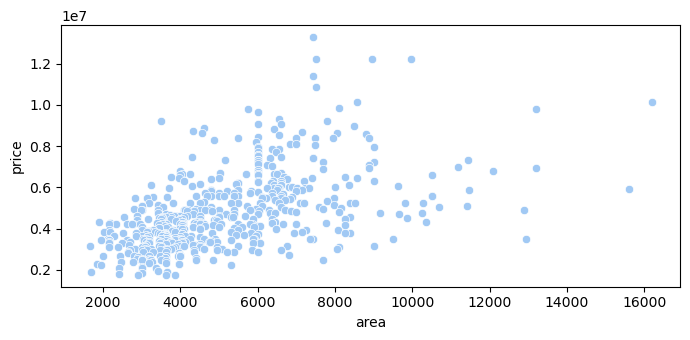

In [141]:
sns.scatterplot(data = df, x='area', y='price')
plt.show()

## Relationship between ['bedrooms', 'bathrooms', 'parking'] and price

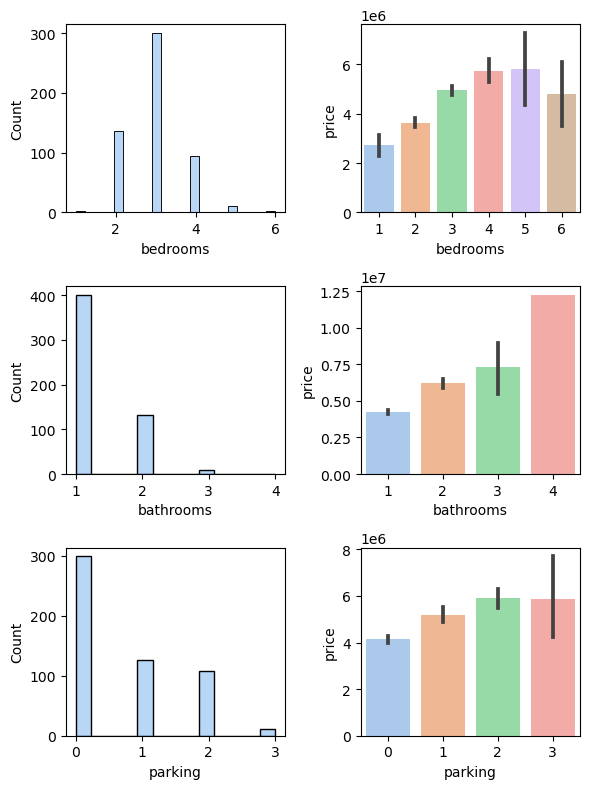

In [142]:
plt.rcParams["figure.figsize"] = [6.00, 8.00]
plt.rcParams["figure.autolayout"] = True

figure, axes = plt.subplots(3, 2)
columns = ['bedrooms', 'bathrooms', 'parking']
plot_types = ['histplot', 'barplot']

for i, column in enumerate(columns):
    for j, plot_type in enumerate(plot_types):
        if plot_type == 'histplot':
            sns.histplot(data=df, x=column, ax=axes[i, j])
        elif plot_type == 'barplot':
            sns.barplot(data=df, x=column, y='price', ax=axes[i, j])

plt.tight_layout()
plt.show()

## Relationship between ['mainroad','guestroom','basement']['hotwaterheating','airconditioning','prefarea','furnishingstatus'] and price 


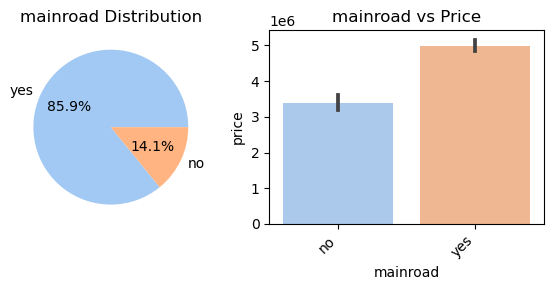

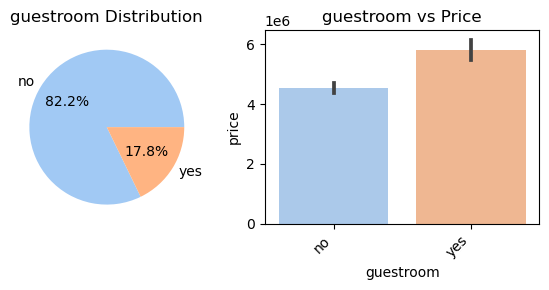

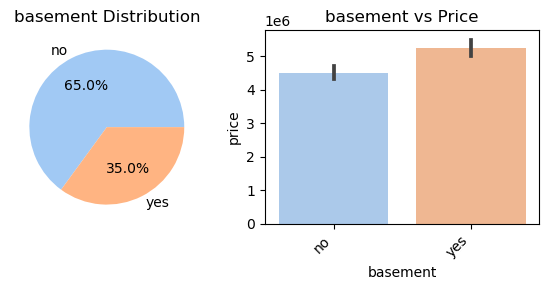

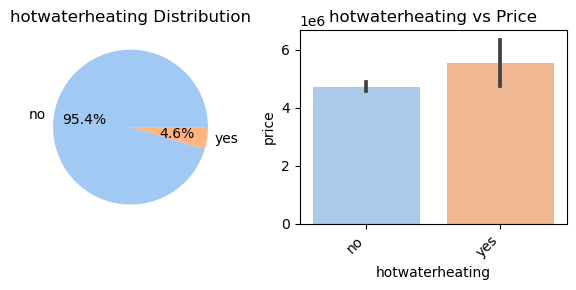

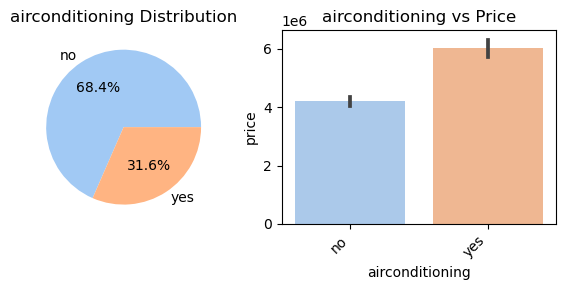

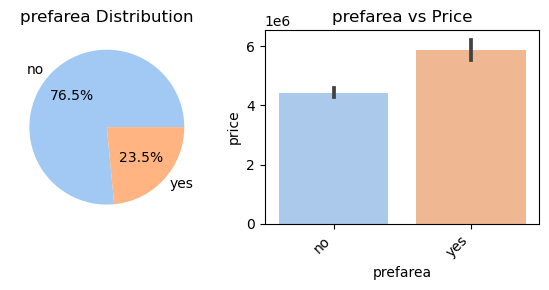

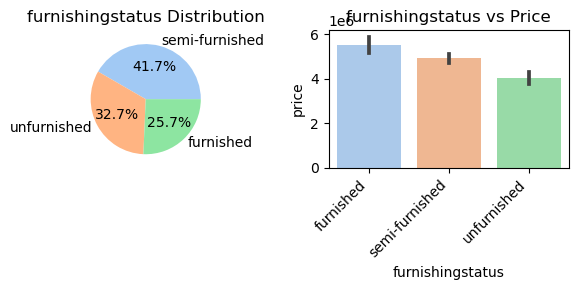

In [143]:
plt.rcParams["figure.figsize"] = [6.00, 3.00]
plt.rcParams["figure.autolayout"] = True

features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
            'airconditioning', 'prefarea', 'furnishingstatus']

for feature in features:
    fig, axes = plt.subplots(1, 2)
    
    counts = df[feature].value_counts()
    axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%')
    axes[0].set_title(f'{feature} Distribution')
    
    sns.barplot(data=df, x=feature, y='price', ax=axes[1])
    axes[1].set_title(f'{feature} vs Price')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')
    
    plt.tight_layout()
    plt.show()

# Data Analysis

In [144]:
import statsmodels.api as sm

### 1. Add Dummy Variables

In [145]:
df = pd.get_dummies(df, columns=['mainroad', 'guestroom','basement', 'hotwaterheating',
                                'airconditioning','prefarea', 'furnishingstatus'], 
                    dtype=int, drop_first=True, )
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


### 2. Select 'y' && 'X'

In [146]:
y = df['price']
X = df.drop('price', axis =1)

### 3. Check Correlation

In [147]:
X.corr().abs()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,0.009229,0.222393,0.234779,0.006156,0.142278
bedrooms,0.151858,1.000000,0.373930,0.408564,0.139270,0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,0.126252
bathrooms,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,0.132107
stories,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,0.172394,0.018847,0.293602,0.044425,0.003648,0.082972
parking,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,0.165705
mainroad_yes,0.288874,0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,0.011781,0.105423,0.199876,0.011450,0.133123
guestroom_yes,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,0.010308,0.138179,0.160897,0.005821,0.099023
basement_yes,0.047417,0.097312,0.102106,0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,0.117935
hotwaterheating_yes,0.009229,0.046049,0.067159,0.018847,0.067864,0.011781,0.010308,0.004385,1.000000,0.130023,0.059411,0.063819,0.059194
airconditioning_yes,0.222393,0.160603,0.186915,0.293602,0.159173,0.105423,0.138179,0.047341,0.130023,1.000000,0.117382,0.053179,0.094086


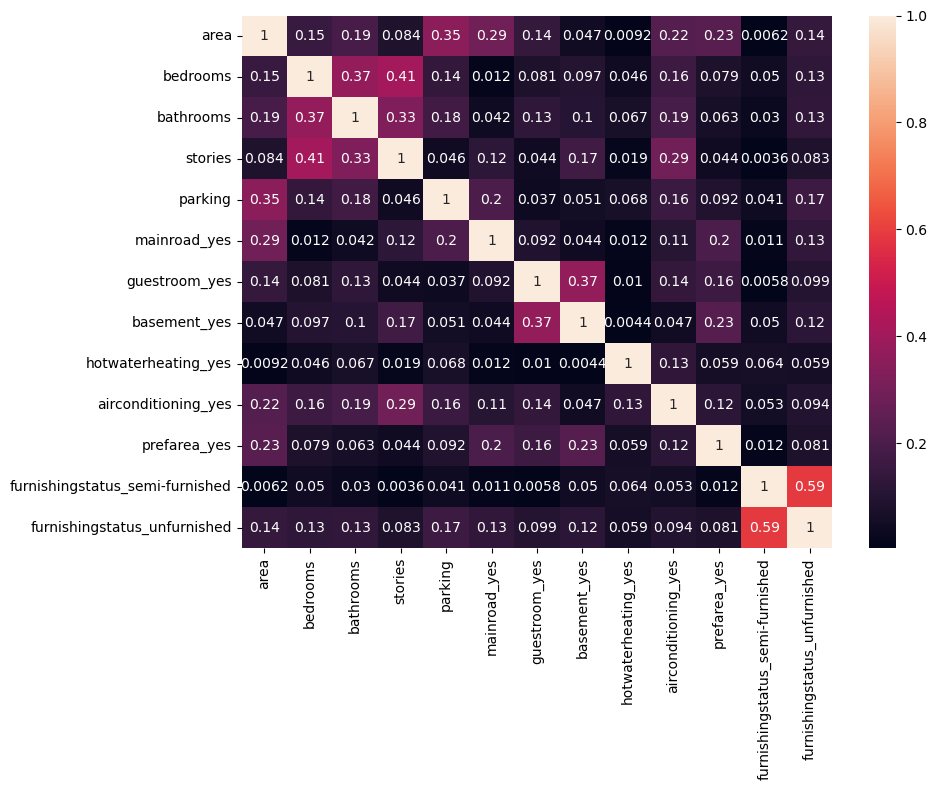

In [148]:
plt.figure(figsize=(10, 8))
plt.rcParams["figure.autolayout"] = True
sns.heatmap(X.corr().abs(), annot= True)
plt.tight_layout()
plt.show()

**summary:**
no high correlation value

### 4. Add constant

In [149]:
X = sm.add_constant(X)
X

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


### 5. Build Linear Regression Model

In [150]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          9.07e-123
Time:                        22:20:55   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 6. Check P - Value

The P - value of 'const', 'bedrooms', 'furnishingstatus_semi-furnished' > 0.05 ---> drop them

In [151]:
X = X.drop(['const', 'bedrooms', 'furnishingstatus_semi-furnished'], axis=1)

In [152]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):                        0.00
Time:                        22:20:55   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Summary:**

1)The linear regression model predicts that an increase in (or presence of) the following factors will significantly increase the price of the house: 
* size of the house 
* number of toilets
* number of floors, 
* garage capacity, 
* located on the main road, 
* having a guest room, 
* having a basement, 
* having a water heater, 
* having air conditioning, 
* located in a preferred neighbourhood in the city.

2)The linear regression model predicts that an increase in (or presence of) the following factors will significantly decrease the price of the house: 
* the house is unfurnished and rough.

## Predict Price

**6,500 sq. ft. with 4 bedrooms, 2 toilets, 2 floors in total, not located on the main road, no guest house, with basement, hot water heater, no air conditioning, 2 parking spaces, located in the preferred neighbourhood of the city, with simple renovations.**

In [153]:
price_to_predict = pd.DataFrame({'area': [6500], 'bedrooms': [4], 'bathrooms': [2], 
                                 'stories': [2], 'mainroad': ['no'], 'guestroom': ['no'],
                                 'basement': ['yes'], 'hotwaterheating': ['yes'],
                                 'airconditioning': ['no'], 'parking': 2, 'prefarea': ['yes'],
                                 'furnishingstatus': ['semi-furnished']})
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,6500,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


In [154]:
price_to_predict['mainroad'] = pd.Categorical(price_to_predict['mainroad'], categories=['no', 'yes'])
price_to_predict['guestroom'] = pd.Categorical(price_to_predict['guestroom'], categories=['no', 'yes'])
price_to_predict['basement'] = pd.Categorical(price_to_predict['basement'], categories=['no', 'yes'])
price_to_predict['hotwaterheating'] = pd.Categorical(price_to_predict['hotwaterheating'], categories=['no', 'yes'])
price_to_predict['airconditioning'] = pd.Categorical(price_to_predict['airconditioning'], categories=['no', 'yes'])
price_to_predict['prefarea'] = pd.Categorical(price_to_predict['prefarea'], categories=['no', 'yes'])
price_to_predict['furnishingstatus'] = pd.Categorical(price_to_predict['furnishingstatus'], categories=['furnished', 'semi-furnished', 'unfurnished'])

In [155]:
price_to_predict = pd.get_dummies(price_to_predict, drop_first=True, 
                                  columns=['mainroad', 'guestroom',
                                           'basement', 'hotwaterheating',
                                           'airconditioning','prefarea', 
                                           'furnishingstatus'], dtype=int)
price_to_predict

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,6500,4,2,2,2,0,0,1,1,0,1,1,0


In [156]:
price_to_predict = price_to_predict.drop(['bedrooms', 'furnishingstatus_semi-furnished'], axis=1)

In [157]:
predicted_value = model.predict(price_to_predict)
predicted_value

0    7.303754e+06
dtype: float64

The linear regression model predicts a price of 7303754.